|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|


### Section 18-3, diffusion binaire avec réaction hétérogène sur la surface

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-18-Section-18-3.png'>

>> Ce développement est très similaire à la section précédente, mais avec deux différences importantes:
>>> * La concentration en $x=\delta$ est nulle car il y a une réaction catalytique rapite
* La substance A ne diffuse pas dans un milieu stagnant $N_B \ne 0$

>> On se base donc sur le développement fait en 18.2, mais seulement en partie


In [1]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions

z,D_AB,C,S,delta_z,C1,C2,X0,delta=sp.symbols('z,D_AB,C,S,delta_z,C1,C2,X_0,delta')                                                            
N_A=sp.symbols('N_A')
N_B=sp.symbols('N_B')
X_A=sp.Function('X_A')(z)     
X_B=sp.Function('X_B')(z)     

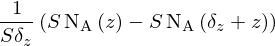

In [3]:
#
# Bilan sur le film
#
eq=(S*N_A(z)-S*N_A(z+delta_z))/(S*delta_z)
display(eq)

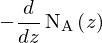

In [4]:
eq=sp.limit(eq,delta_z,0).doit()
display(eq)

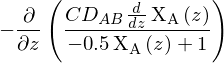

In [5]:
fick=C*D_AB/(1-1/2*X_A)*sp.diff(X_A,z)   # équation 18.0-1 avec NB=-1/2NA
eq=eq.subs(N_A(z),fick)
display(eq)

In [6]:
X_A=sp.dsolve(eq,X_A)
display(X_A)

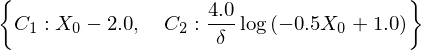

In [7]:
X_A=X_A.rhs
#
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
condition_1=sp.Eq(X_A.subs(z,0)-X0,0)
condition_2=sp.Eq(X_A.subs(z,delta),0) 
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2'),dict=True) #  C1 et C2
constantes=constantes[0]          # voir section 18.2
display(constantes)

In [8]:
X_A=X_A.subs(constantes)             # qui avait été crée par solve. ?????
display(X_A.simplify())

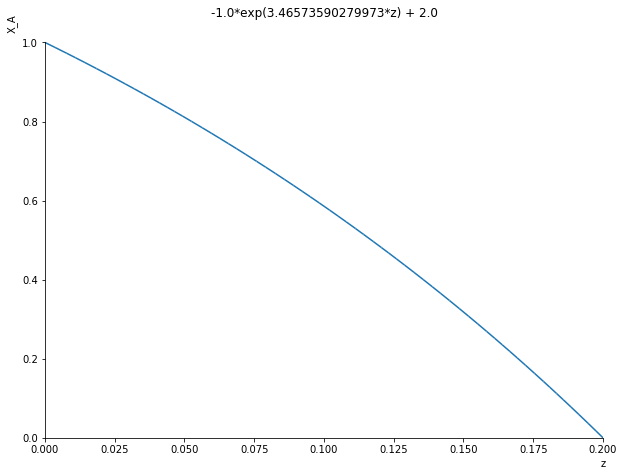

In [9]:
#
# Tracons
#
dico={'delta':0.2,'X_0':1}
X_Aplot=X_A.subs(dico)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
sp.plot(X_Aplot,(z,0.0,delta.subs(dico)),ylabel='X_A',title=X_Aplot);

In [10]:
# L'expression de X_A est un peu différente de celle de Transport Phenomena, problème?
#
# Vérifions si notre expression ci-haut est équivalente à 18.3-8, en x/delta=0.5
#
if (1-1/2*X0.subs(dico))**(1-0.5)==(1-1/2*X_Aplot.subs(z,0.5*delta.subs(dico))):
    print(' Ok')
else:
    Print(' Oups')

 Ok
